<a href="https://colab.research.google.com/github/en-ashay/Geolocation/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv("add.csv")

In [0]:
# See last 5 rows
data.tail(5)

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


## We should Drop column Unnamd: 0 as we don't require the indices separately

In [0]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)


In [0]:
data.columns.tolist()

['TV', 'radio', 'newspaper', 'sales']

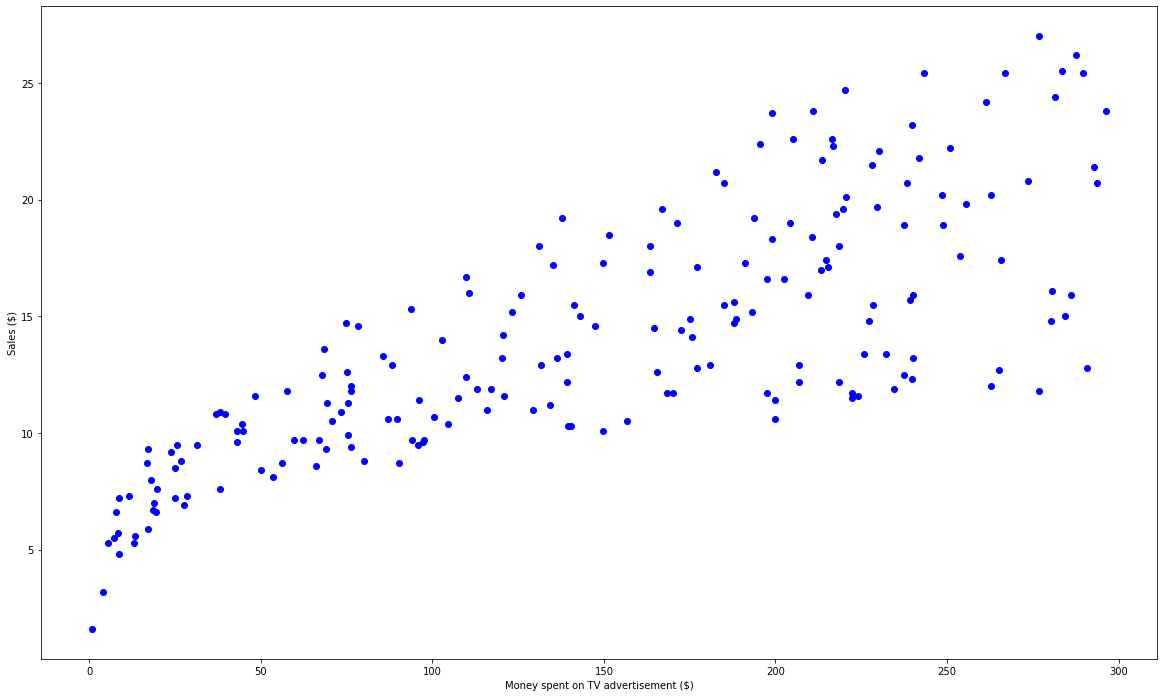

In [0]:
# Scatterplot of data
plt.figure(figsize=(20, 12))
plt.scatter(
    data['TV'],
    data['sales'],
    c='blue'
)
plt.xlabel("Money spent on TV advertisement ($)")
plt.ylabel("Sales ($)")
plt.show()

In [0]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

# Defining Model
reg = LinearRegression(n_jobs=-1)    
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [0]:
# Parameters of the model
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False}

In [0]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

# model of form y=ax + b

print("The linear model is: Y={:.5}x + {:.5}".format(reg.coef_[0][0],reg.intercept_[0]))

0.04753664043301975
7.032593549127695
The linear model is: Y=0.047537x + 7.0326


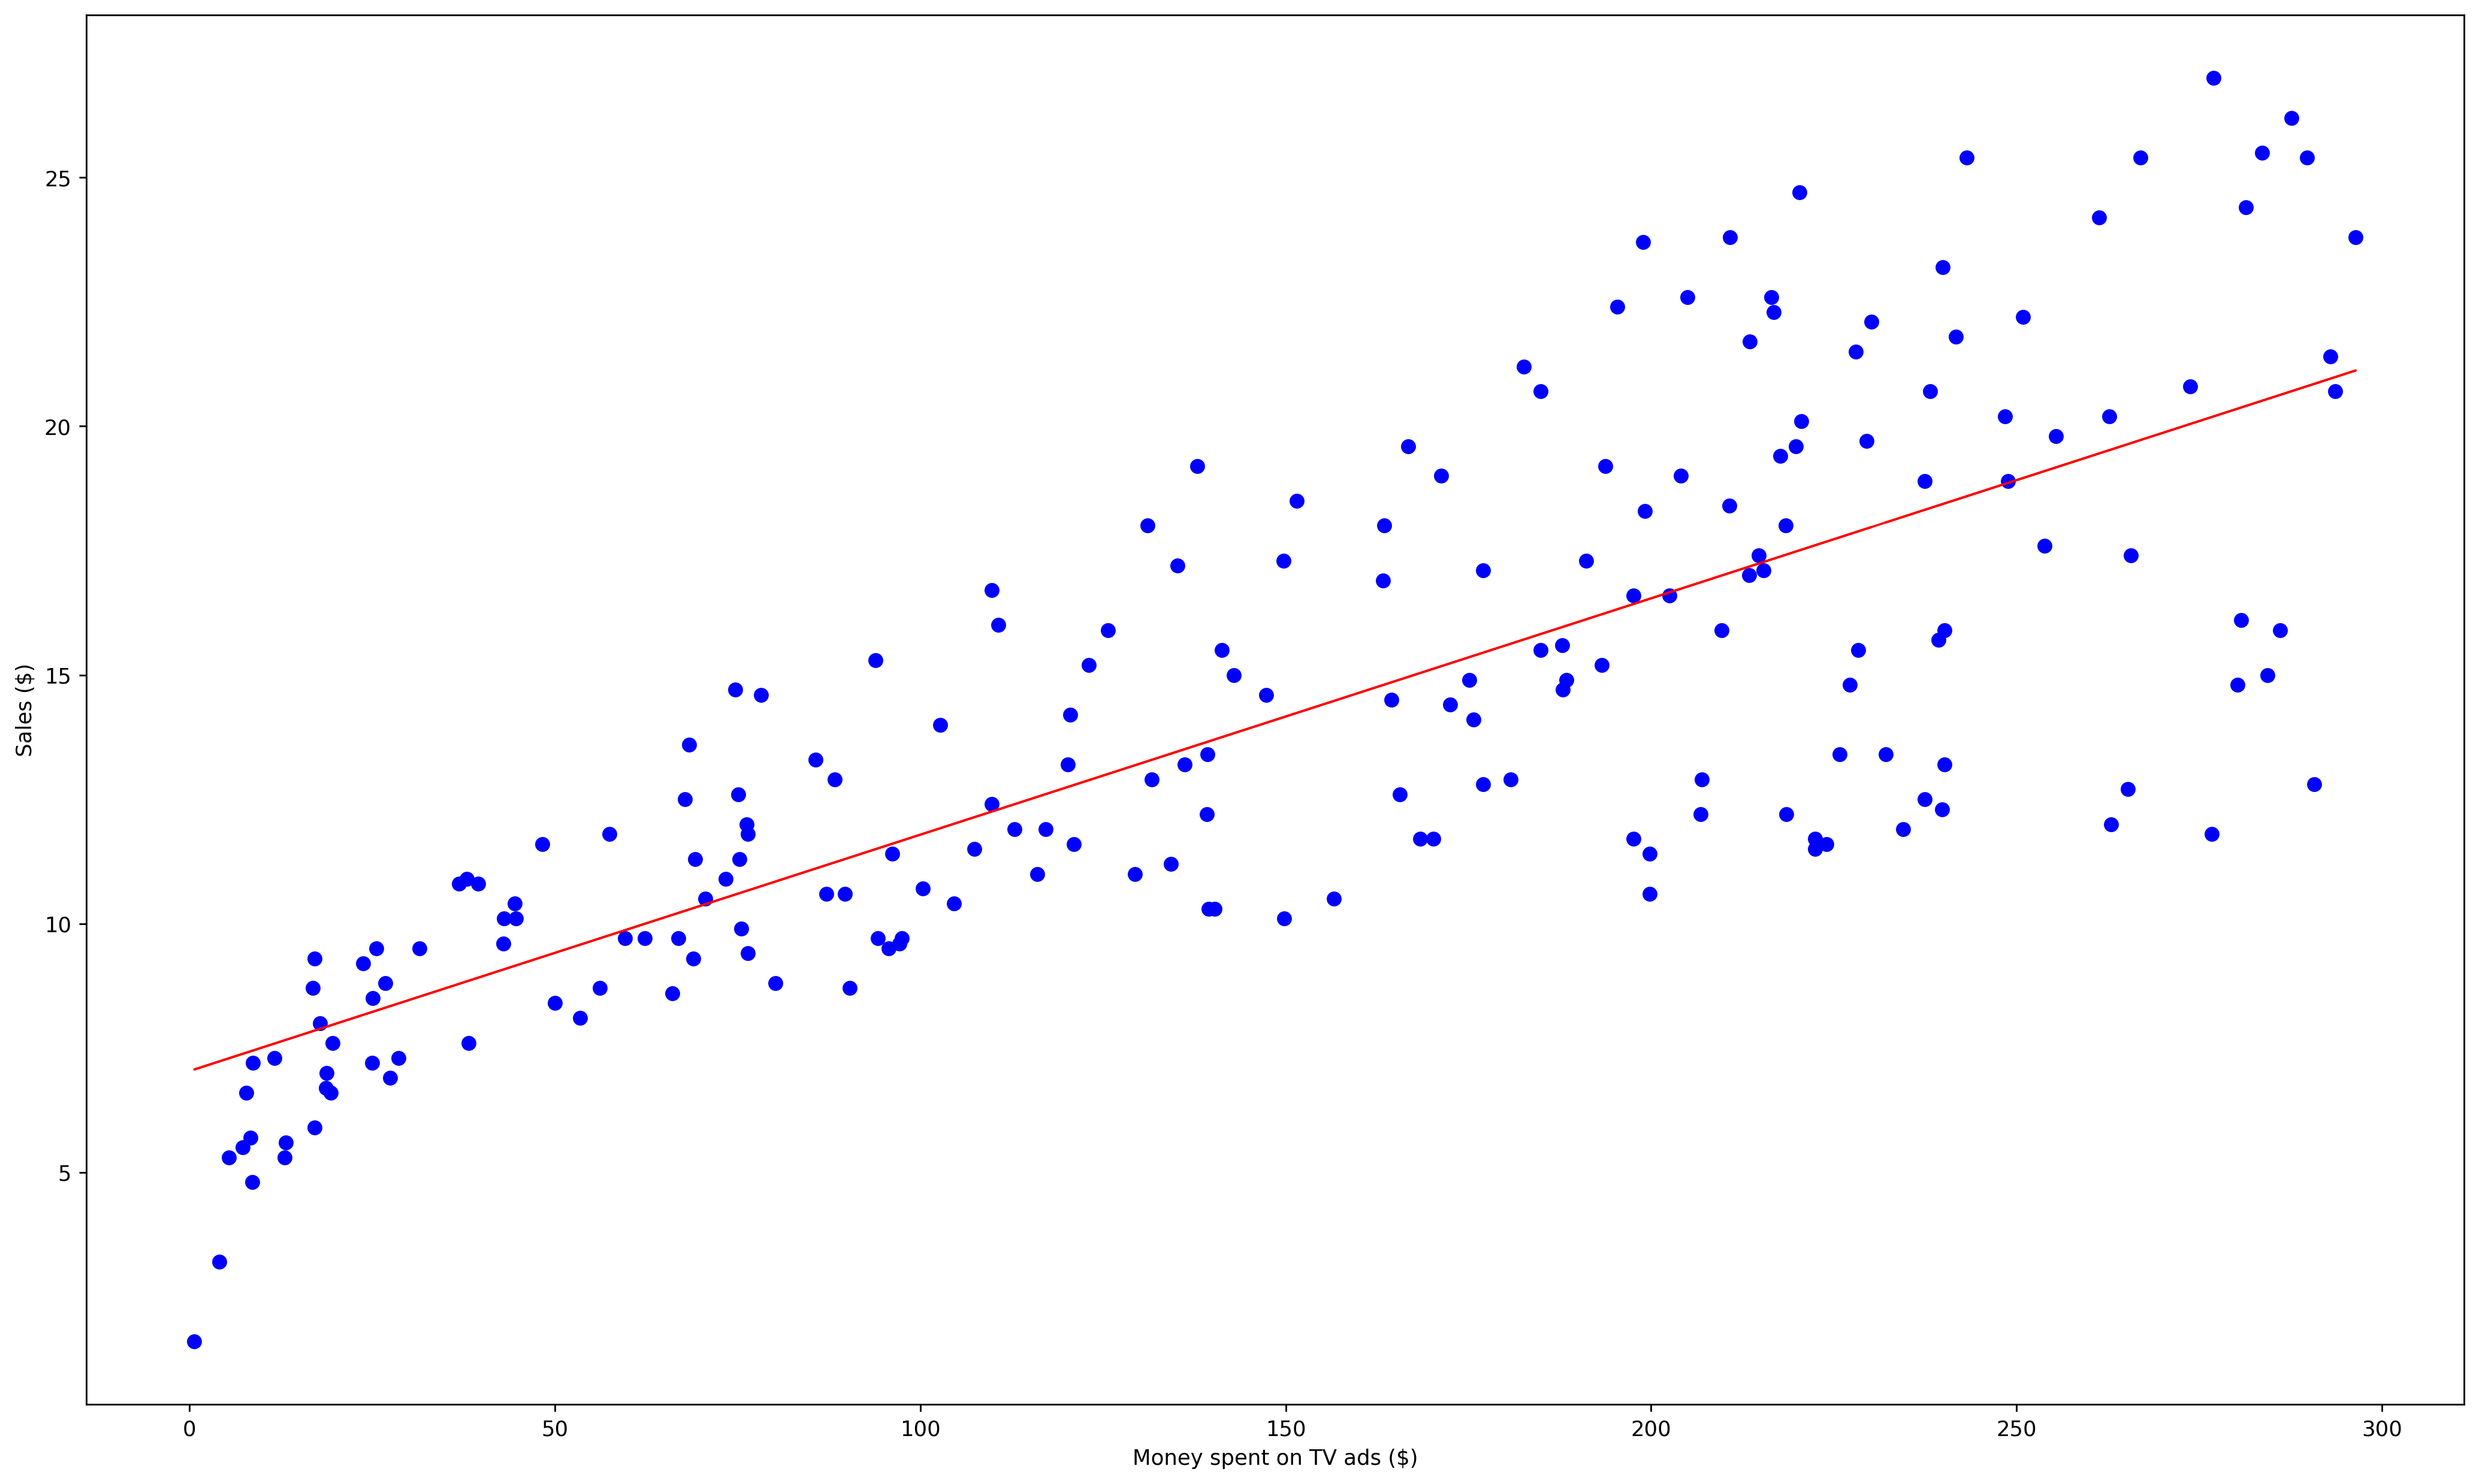

In [0]:
# Let us see how good the regression line fits the data
predictions = reg.predict(X)

plt.figure(figsize=(20, 12),dpi=256)
plt.scatter(
    data['TV'],
    data['sales'],
    c='blue'
)
plt.plot(
    data['TV'],
    predictions,
    c='red',
    linewidth=1
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

## Multiple Regression

-> Used to predict the result based on values of more than one variables. Here to predict sales value based on various input columns

In [0]:
Xs = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:

print(reg.coef_)
print(reg.intercept_)

[[ 0.04576465  0.18853002 -0.00103749]]
[2.93888937]


In [0]:
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

The linear model is: Y = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper


In [0]:
reg.score(Xs, y)

0.8972106381789521